# Data Preprocessing

In [2]:
import numpy as np
import os
import cv2
import tensorflow as tf
import pickle
from random import shuffle
import matplotlib.pyplot as plt
import datetime

In [3]:
!pip install opencv-python

In [4]:
dataset = os.path.join(os.getcwd(), "Data1\\Train")
data = []
for i , value in enumerate(os.listdir(dataset)):
    f_dir = os.path.join(dataset,value)
    for each in os.listdir(f_dir):
        image = cv2.imread(os.path.join(f_dir,each),0)
        image = cv2.resize(image,(224,224))
        data.append((image,i))

In [5]:
data[0][0].shape

(224, 224)

In [6]:
shuffle(data)
x = []
y = []
for features , label in data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,224,224,1)
pickle_out = open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
x[0].shape

(224, 224, 1)

In [8]:
x[0].shape[1:]

(224, 1)

# Training

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
X = X/255.0
print(x)
y=np.array(y)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

logdir = "logs\\scalars\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3,  callbacks=[tensorboard_callback])

model.save("model.h5")

# Testing

In [ ]:
model = tf.keras.models.load_model('model.h5')
model.summary()

In [144]:
""""def test(path):
    image = cv2.imread(path,1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    min_x = image.shape[0]
    min_y = image.shape[1]
    max_x = 0
    max_y = 0
    canny = cv2.Canny(blurred,0,250)
    (cnts,_) = cv2.findContours(canny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    coints = image.copy()
    frame = image.copy()
    cv2.drawContours(frame,cnts,-1,(255,0,0),2)
    for cnt in cnts:
        x ,y,w,h = cv2.boundingRect(cnt)
        area = w * h
        if area > ((image.shape[0] * image.shape[1]) * 0.2):
            if min_x > x:
                min_x = x
            if min_y > y:
                min_y = y
            if max_x < (x + w):
                max_x = x + w
            if max_y < (y + h):
                max_y = y +h
    cv2.rectangle(coints,(min_x,min_y),(max_x,max_y),(0,255,0),2)
    roi = gray[min_y:max_y,min_x:max_x]
    image = cv2.resize(roi,(224,224))
    x = np.array(image).reshape(-1,224,224,1)
    y = model.predict(x)
    print(y[0][0])"""

'"def test(path):\n    image = cv2.imread(path,1)\n    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    blurred = cv2.GaussianBlur(gray,(5,5),0)\n    min_x = image.shape[0]\n    min_y = image.shape[1]\n    max_x = 0\n    max_y = 0\n    canny = cv2.Canny(blurred,0,250)\n    (cnts,_) = cv2.findContours(canny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)\n    coints = image.copy()\n    frame = image.copy()\n    cv2.drawContours(frame,cnts,-1,(255,0,0),2)\n    for cnt in cnts:\n        x ,y,w,h = cv2.boundingRect(cnt)\n        area = w * h\n        if area > ((image.shape[0] * image.shape[1]) * 0.2):\n            if min_x > x:\n                min_x = x\n            if min_y > y:\n                min_y = y\n            if max_x < (x + w):\n                max_x = x + w\n            if max_y < (y + h):\n                max_y = y +h\n    cv2.rectangle(coints,(min_x,min_y),(max_x,max_y),(0,255,0),2)\n    roi = gray[min_y:max_y,min_x:max_x]\n    image = cv2.resize(roi,(224,224))\n    x = np

In [145]:
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
def ptest(path):
    image = cv2.imread(path,0)
    image = cv2.resize(image,(224,224))
    x = np.array(image).reshape(-1,224,224,1)
    y = model.predict_classes(x)
    return y[0][0]

In [20]:
for i , each in enumerate(os.listdir("Data1\\Test")):
    print(each,f"expected {i} : observerd ->")

    for file in os.listdir(f"Data1\\Test/{each}"):
        print(file," -> ",ptest(f"Data1\\Test/{each}/"+file))
        


Benign expected 0 : observerd ->
0 (1).png  ->  0
0 (10).png  ->  0
0 (11).png  ->  0
0 (12).png  ->  0
0 (13).png  ->  0
0 (14).png  ->  0
0 (15).png  ->  0
0 (16).png  ->  0
0 (17).png  ->  0
0 (18).png  ->  1
0 (19).png  ->  1
0 (2).png  ->  0
0 (20).png  ->  0
0 (3).png  ->  0
0 (4).png  ->  0
0 (5).png  ->  0
0 (6).png  ->  0
0 (7).png  ->  0
0 (8).png  ->  0
0 (9).png  ->  0
Malignant expected 1 : observerd ->
1 (1).png  ->  1
1 (10).png  ->  1
1 (11).png  ->  0
1 (12).png  ->  1
1 (13).png  ->  1
1 (14).png  ->  1
1 (15).png  ->  1
1 (16).png  ->  0
1 (17).png  ->  1
1 (18).png  ->  1
1 (19).png  ->  1
1 (2).png  ->  1
1 (20).png  ->  1
1 (3).png  ->  0
1 (4).png  ->  1
1 (5).png  ->  1
1 (6).png  ->  1
1 (7).png  ->  1
1 (8).png  ->  1
1 (9).png  ->  1


In [8]:
for layer in model.layers:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            print(filt)

          

conv2d_70 (3, 3, 1, 32)
[[[0.897985  ]
  [0.11314771]
  [0.00511989]]

 [[0.61530864]
  [0.5440169 ]
  [0.22610396]]

 [[0.54264265]
  [0.7350282 ]
  [0.7315259 ]]]
[[[0.77764994]
  [0.5341464 ]
  [0.7934364 ]]

 [[0.7818967 ]
  [0.77125305]
  [0.07127408]]

 [[0.6358692 ]
  [0.2670874 ]
  [0.66257995]]]
[[[0.4040056 ]
  [0.16903402]
  [0.14575225]]

 [[0.5742353 ]
  [0.64842093]
  [0.6153016 ]]

 [[0.9384491 ]
  [0.32726404]
  [0.29168853]]]
[[[0.09752516]
  [0.30718732]
  [0.02280186]]

 [[0.51793957]
  [0.84378964]
  [0.75612456]]

 [[0.46578598]
  [0.8575227 ]
  [0.4952058 ]]]
[[[0.47719008]
  [0.634561  ]
  [0.14944412]]

 [[0.5967938 ]
  [0.4785362 ]
  [0.70460355]]

 [[0.10319716]
  [0.22402781]
  [0.26695493]]]
[[[0.67314136]
  [0.81621647]
  [0.7901753 ]]

 [[0.41319183]
  [0.5606908 ]
  [0.6541583 ]]

 [[0.39289188]
  [0.66581345]
  [0.7157535 ]]]
[[[0.25981507]
  [0.7778119 ]
  [0.66603297]]

 [[0.04688375]
  [0.        ]
  [0.63168633]]

 [[0.21564974]
  [0.35495165]
  [0.3

ValueError: not enough values to unpack (expected 2, got 0)

conv2d_70 (3, 3, 1, 32)
32


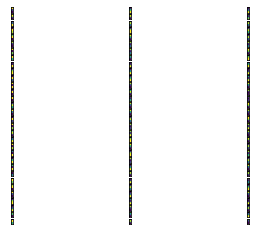

conv2d_71 (3, 3, 32, 32)
32


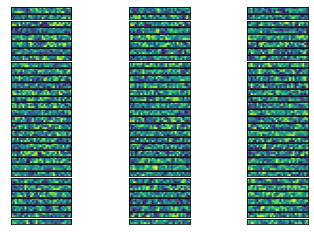

conv2d_72 (3, 3, 32, 64)
64


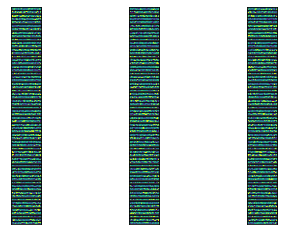

conv2d_73 (3, 3, 64, 64)
64


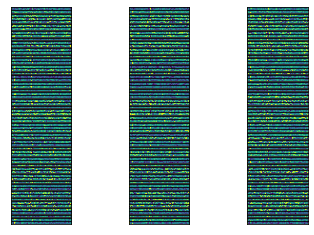

In [159]:
for layer in model.layers:
      if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        print(filters.shape[3])
        filter_cnt=1
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

In [70]:
!tensorboard --logdir logs/scalars

^C


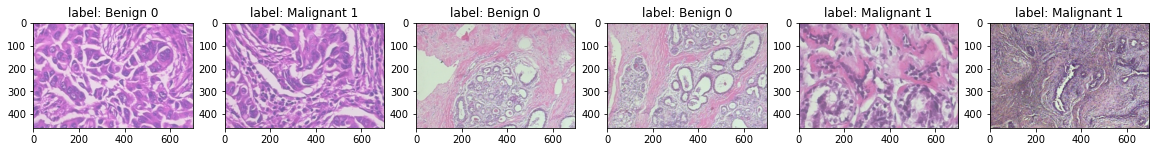

In [19]:
l=[]
for file in os.listdir(f"Prediction_data/"):
    l.append(file)

def run_app(img_path):
    image = cv2.imread(img_path,0)
    image = cv2.resize(image,(224,224))
    x = np.array(image).reshape(-1,224,224,1)
    prediction = model.predict_classes(x)
    return prediction[0][0]
    
w=60
h=40
fig=plt.figure(figsize=(20, 20))
columns =6
rows = 1

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    pred = run_app(l[i])
    if pred == 0:
        #benign
        text = "label: Benign " + str(pred)
        ax.title.set_text(text)
    else:
        #malignant
        text = "label: Malignant "+ str(pred)
        ax.title.set_text(text)
    img = cv2.imread(l[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

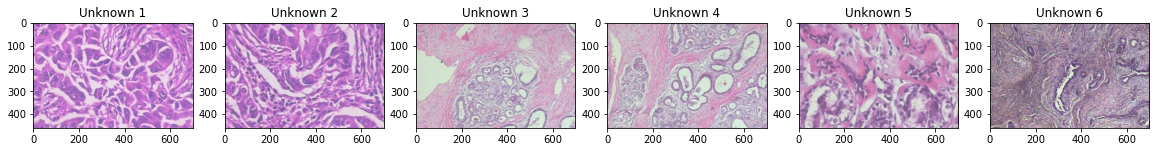

In [21]:
w=60
h=40
fig=plt.figure(figsize=(20, 20))
columns =6
rows = 1
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text("Unknown " + str(i))
    img = cv2.imread(l[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()